# Assignment 1-d: Deep Learning Hello World! (3-layer MLP+Dropout+Optimizer)

Objective: To be able to improve upon the 3-layer MLP + Dropout in part 3 by adding different optimization for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Step 2: Set-up some constants to be utilized in the training/testing of the model <br\>
Note: the number of epochs (NB_EPOCH) is increased to 250

In [4]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits, i.e. 0,1,2,3,4,5,6,7,8,9
OPTIMIZER = Adam()  
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN dataset is reserved for VALIDATION

DROPOUT = 0.3

np.random.seed(1983)  # for reproducibility

Step 3: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

First 100 train images:


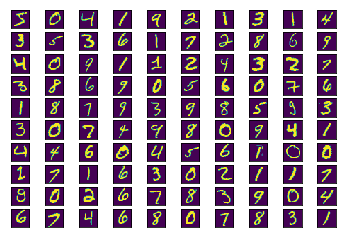

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("First 100 train images:")
for k in range(100):
    plt.subplot(10, 10, k+1)      
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(X_train[k])

Step 4: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [6]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


Step 5: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [7]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Step 6: Create the model with 3 layers: Input:784 ==> Hidden:128 w/ dropout ==> Hidden:128 w/ dropout ==> Output:10 (with Softmax activation)

In [8]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

Step 7: Compile the model with categorical_crossentropy loss function, Adam optimizer, and accuracy metric

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Step 8: Perform the training with 128 batch size, 250 epochs, and 20 % of the train data used for validation

In [10]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 3s - loss: 0.5104 - acc: 0.8449 - val_loss: 0.1830 - val_acc: 0.9469
Epoch 2/250
48000/48000 [==============================] - 3s - loss: 0.2360 - acc: 0.9299 - val_loss: 0.1370 - val_acc: 0.9599
Epoch 3/250
48000/48000 [==============================] - 3s - loss: 0.1813 - acc: 0.9462 - val_loss: 0.1222 - val_acc: 0.9644
Epoch 4/250
48000/48000 [==============================] - 3s - loss: 0.1536 - acc: 0.9539 - val_loss: 0.1060 - val_acc: 0.9685
Epoch 5/250
48000/48000 [==============================] - 3s - loss: 0.1289 - acc: 0.9605 - val_loss: 0.0978 - val_acc: 0.9706
Epoch 6/250
48000/48000 [==============================] - 3s - loss: 0.1160 - acc: 0.9646 - val_loss: 0.0967 - val_acc: 0.9727
Epoch 7/250
48000/48000 [==============================] - 3s - loss: 0.1093 - acc: 0.9667 - val_loss: 0.0916 - val_acc: 0.9738
Epoch 8/250
48000/48000 [=============================

48000/48000 [==============================] - 3s - loss: 0.0191 - acc: 0.9934 - val_loss: 0.1070 - val_acc: 0.9793
Epoch 128/250
48000/48000 [==============================] - 3s - loss: 0.0209 - acc: 0.9934 - val_loss: 0.1038 - val_acc: 0.9807
Epoch 129/250
48000/48000 [==============================] - 3s - loss: 0.0195 - acc: 0.9935 - val_loss: 0.1103 - val_acc: 0.9794
Epoch 130/250
48000/48000 [==============================] - 3s - loss: 0.0191 - acc: 0.9936 - val_loss: 0.1077 - val_acc: 0.9809
Epoch 131/250
48000/48000 [==============================] - 3s - loss: 0.0197 - acc: 0.9937 - val_loss: 0.1083 - val_acc: 0.9804
Epoch 132/250
48000/48000 [==============================] - 3s - loss: 0.0188 - acc: 0.9937 - val_loss: 0.1059 - val_acc: 0.9802
Epoch 133/250
48000/48000 [==============================] - 3s - loss: 0.0209 - acc: 0.9931 - val_loss: 0.1114 - val_acc: 0.9800
Epoch 134/250
48000/48000 [==============================] - 3s - loss: 0.0195 - acc: 0.9937 - val_loss:

Step 9: Evaluate the model on the test dataset (10,000 images)

In [11]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9728/10000 [============================>.] - ETA: 0s
Test score: 0.114303596618
Test accuracy: 0.9811


Step 10: Plot the accuracy from history

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


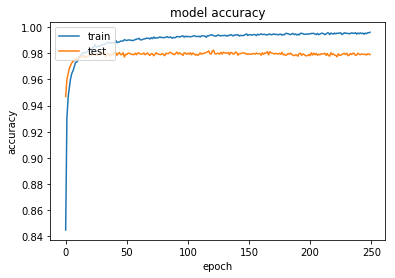

In [12]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Step 11: Plot the loss from history

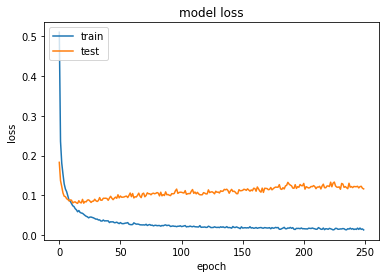

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[Optional] Step 12: Save the model (serialized) to JSON

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  08:17 PM    <DIR>          .
09/17/2017  08:17 PM    <DIR>          ..
09/17/2017  07:50 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  01:16 PM            50,073 DeepLearningHelloWorld.ipynb
09/17/2017  04:32 PM            56,578 DeepLearningHelloWorldPart2.ipynb
09/17/2017  06:47 PM           126,727 DeepLearningHelloWorldPart3.ipynb
09/17/2017  08:17 PM           126,846 DeepLearningHelloWorldPart4.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  06:44 PM           492,240 model.h5
09/17/2017  08:18 PM             2,059 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               6 File(s)        854,523 bytes
               8 Dir(s)  199,404,728,320 bytes free


[Optional] Step 13: Save the model weights

In [15]:
model.save_weights("model.h5")
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  08:17 PM    <DIR>          .
09/17/2017  08:17 PM    <DIR>          ..
09/17/2017  07:50 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  01:16 PM            50,073 DeepLearningHelloWorld.ipynb
09/17/2017  04:32 PM            56,578 DeepLearningHelloWorldPart2.ipynb
09/17/2017  06:47 PM           126,727 DeepLearningHelloWorldPart3.ipynb
09/17/2017  08:17 PM           126,846 DeepLearningHelloWorldPart4.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  08:18 PM           492,240 model.h5
09/17/2017  08:18 PM             2,059 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               6 File(s)        854,523 bytes
               8 Dir(s)  199,410,405,376 bytes free


[Optional] Step 14: Load the saved model

In [16]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

[Optional] Step 15: Compile and evaluate loaded model

In [17]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9760/10000 [============================>.] - ETA: 0s
Test score: 0.114303596618
Test accuracy: 0.9811
